# PCA: Полное руководство с формулами

---

## 1. Постановка задачи  
Пусть даны центрированные данные в виде матрицы $X_c$ размерности $n \times m$.

**Ковариационная матрица**:  
$$
\Sigma = \frac{1}{n-1} X_c^T X_c
$$

---

## 2. Вычисление матрицы ковариаций  
**Формула**:  
$$
\Sigma = \frac{1}{n-1} X_c^T X_c
$$

**Пояснение**:  
- $X_c$ — центрированная матрица данных.  
- $n$ — количество объектов, $m$ — количество признаков.  

---

## 3. Нахождение собственных значений и векторов  
Для симметричной матрицы $\Sigma$:  
- Собственные значения $\lambda_i$ вещественные и неотрицательные.  
- Собственные векторы $v_i$ ортонормированы.  

**Уравнение**:  
$$
\Sigma v = \lambda v
$$

**Пример для матрицы 2×2**:  
$$
\Sigma = \begin{bmatrix} 4 & 2 \\ 2 & 3 \end{bmatrix}
$$

**Собственные значения**:  
$$
\lambda_1 = 5.56, \quad \lambda_2 = 1.44
$$

---

## 4. Проекция данных  
**Формула проекции**:  
$$
X_{\text{proj}} = X_c \cdot V_k
$$  
где $V_k$ — матрица первых $k$ собственных векторов.  

**Доля объяснённой дисперсии**:  
$$
\gamma = \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^m \lambda_i}
$$

---

## 5. Доказательство оптимальности PCA  
Оптимальные направления PCA — собственные векторы $\Sigma$, максимизирующие дисперсию.  
**Доказательство через Лагранжиан**:  
$$
\mathcal{L}(v, \lambda) = v^T \Sigma v - \lambda (v^T v - 1)
$$

**Условие экстремума**:  
$$
\Sigma v = \lambda v
$$

---


# Задание (Easy): Реализовать метод Гаусса для решения СЛАУ:

In [753]:
import math
import unittest
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import random

In [754]:
class Matrix:
    def __init__(self, data=None):
        self.data = data if data else []
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

    def __setitem__(self, index, value):
        self.data[index] = value

    def append_row(self, row):
        self.data.append(row.copy())

    def transpose(self):
        """Транспонированная матрица."""
        if not self.data:
            return Matrix()
        return Matrix([list(row) for row in zip(*self.data)])

    def get_row(self, index):
        return self.data[index]

    def get_column(self, index):
        """Возвращает столбец матрицы по индексу."""
        return [row[index] for row in self.data]

    def __repr__(self):
        return "\n".join(["\t".join(map(str, row)) for row in self.data])

    def multiply(self, other):
      if len(self.data[0]) != len(other.data):
          raise ValueError("Несовместимые размеры матриц")
      result = []
      for i in range(len(self.data)):
          row = []
          for j in range(len(other.data[0])):
              val = sum(self.data[i][k] * other.data[k][j] for k in range(len(other.data)))
              row.append(val)
          result.append(row)
      return Matrix(result)

    def scalar_multiply(self, scalar):
        """Умножение на скаляр."""
        return Matrix([[elem * scalar for elem in row] for row in self.data])

    def __str__(self):
        """Строковое представление (для print)."""
        return "\n".join(["\t".join(map("{:.2f}".format, row)) for row in self.data])

    def determinant(self):
        """Вычисляет определитель матрицы методом LU-разложения."""
        n = len(self.data)
        if n == 0 or len(self.data[0]) != n:
            raise ValueError("Матрица должна быть квадратной")
        LU = [row.copy() for row in self.data]
        det = 1.0
        for i in range(n):
            pivot = i
            for j in range(i, n):
                if abs(LU[j][i]) > abs(LU[pivot][i]):
                    pivot = j
            if pivot != i:
                LU[i], LU[pivot] = LU[pivot], LU[i]
                det *= -1
            if abs(LU[i][i]) < 1e-10:
                return 0.0
            det *= LU[i][i]
            for j in range(i + 1, n):
                LU[j][i] /= LU[i][i]
                for k in range(i + 1, n):
                    LU[j][k] -= LU[j][i] * LU[i][k]
        return det

    @property
    def nrows(self):
        """Количество строк."""
        return len(self.data)

    @property
    def ncols(self):
        """Количество столбцов."""
        return len(self.data[0]) if self.data else 0

    def copy(self):
        """Глубокая копия матрицы."""
        return Matrix([row.copy() for row in self.data])

    def __getitem__(self, index):
        return self.data[index]

    def __setitem__(self, index, value):
        self.data[index] = value


In [755]:
def gauss_solver(A, b):
    """
    Решает СЛАУ методом Гаусса.
    Возвращает список базисных векторов решения.
    """
    n = len(A)
    augmented = Matrix()

    # Создание расширенной матрицы [A | b]
    for i in range(n):
        augmented_row = A.get_row(i) + [b.get_row(i)[0]]
        augmented.append_row(augmented_row)

    # Прямой ход
    for col in range(n):
        # Поиск ведущего элемента
        pivot_row = None
        for row in range(col, n):
            if abs(augmented[row][col]) > 1e-10:
                pivot_row = row
                break
        if pivot_row is None:
            continue

        # Перестановка строк
        augmented[col], augmented[pivot_row] = augmented[pivot_row], augmented[col]

        # Нормализация ведущей строки
        pivot = augmented[col][col]
        if abs(pivot) < 1e-10:
            raise ValueError("Система вырождена")
        for j in range(col, len(augmented[col])):
            augmented[col][j] /= pivot

        # Обнуление элементов ниже ведущего
        for i in range(col + 1, n):
            factor = augmented[i][col]
            for j in range(col, len(augmented[i])):
                augmented[i][j] -= factor * augmented[col][j]

    # Проверка на несовместность
    for row in augmented:
        if all(abs(x) < 1e-10 for x in row[:-1]) and abs(row[-1]) > 1e-10:
            raise ValueError("Система несовместна")

    # Обратный ход
    rank = sum(1 for row in augmented if not all(abs(x) < 1e-10 for x in row[:-1]))
    if rank < n:
        # Бесконечное множество решений
        free_vars = n - rank
        solutions = []
        for k in range(free_vars):
            solution = [0.0] * n
            solution[rank + k] = 1.0
            for i in range(rank-1, -1, -1):
                sum_val = augmented[i][-1]
                for j in range(i+1, n):
                    sum_val -= augmented[i][j] * solution[j]
                solution[i] = sum_val
            solutions.append(Matrix([[x] for x in solution]))
        return solutions
    else:
        # Единственное решение
        x = [0.0] * n
        for i in range(n-1, -1, -1):
            x[i] = augmented[i][-1]
            for j in range(i+1, n):
                x[i] -= augmented[i][j] * x[j]
        return [Matrix([[xi] for xi in x])]

**Тесты**

In [756]:
class TestGaussSolver(unittest.TestCase):
    def test_unique_solution(self):
        A = Matrix([[2, 1], [1, -1]])
        b = Matrix([[5], [1]])
        solutions = gauss_solver(A, b)
        self.assertAlmostEqual(solutions[0][0][0], 2.0, places=5)
        self.assertAlmostEqual(solutions[0][1][0], 1.0, places=5)

    def test_infinite_solutions(self):
        A = Matrix([[1, 1], [2, 2]])
        b = Matrix([[3], [6]])
        solutions = gauss_solver(A, b)
        self.assertEqual(len(solutions), 1)  # Одна свободная переменная

# Запуск тестов без использования unittest.main()
if __name__ == "__main__":
    test_suite = unittest.TestLoader().loadTestsFromTestCase(TestGaussSolver)
    unittest.TextTestRunner().run(test_suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


# Задание (Easy): Реализовать функцию центрирования данных:

In [757]:
def center_data(X):
    """Центрирование данных."""
    if len(X) == 0:
        return Matrix()

    # Количество строк и столбцов
    n = len(X)
    m = len(X[0]) if X.data else 0

    # Вычисление средних значений по столбцам
    means = [sum(X.get_column(j)) / n for j in range(m)]

    # Центрируем данные, вычитая среднее значение из каждого столбца
    centered = []
    for row in X.data:
        centered_row = [row[j] - means[j] for j in range(m)]
        centered.append(centered_row)

    return Matrix(centered)


In [758]:
# Исходные данные
X = Matrix([
    [1, 2],
    [3, 4],
    [5, 6]
])

# Центрирование
X_centered = center_data(X)
print(X_centered)


-2.00	-2.00
0.00	0.00
2.00	2.00


#Задание (Easy): Вычислить матрицу ковариаций:

In [759]:
def covariance_matrix(X_centered):
    """Вычисляет матрицу ковариаций."""
    if len(X_centered) == 0:
        return Matrix()

    n = len(X_centered)
    if n == 1:
        raise ValueError("Недостаточно данных для вычисления ковариации")

    X_transposed = X_centered.transpose()
    XTX = X_transposed.multiply(X_centered)
    C = XTX.scalar_multiply(1 / (n - 1))

    return C

# Пример использования
X_centered = Matrix([[-2, -2], [0, 0], [2, 2]])
C = covariance_matrix(X_centered)
print(C)

4.00	4.00
4.00	4.00


In [760]:
# Центрированная матрица из предыдущего примера
X_centered = Matrix([[-2, -2], [0, 0], [2, 2]])

# Вычисление матрицы ковариаций
C = covariance_matrix(X_centered)
print(C)

4.00	4.00
4.00	4.00


**Тесты**

In [761]:
# Проверка транспонирования
X = Matrix([[1, 2], [3, 4]])
print(X.transpose())  # Вывод: 1.00    3.00
                     #         2.00    4.00

# Проверка умножения на скаляр
Y = Matrix([[1, 2], [3, 4]])
print(Y.scalar_multiply(2))  # Вывод: 2.00    4.00
                            #         6.00    8.00

1.00	3.00
2.00	4.00
2.00	4.00
6.00	8.00


# Задание (Normal): Найти собственные значения матрицы C методом бисекции:

In [762]:
def find_eigenvalues(C, tol=1e-6):
    """
    Находит собственные значения симметричной матрицы методом бисекции.

    Аргументы:
        C (Matrix): Квадратная симметричная матрица (m×m).
        tol (float): Точность вычислений.

    Возвращает:
        list: Список собственных значений в порядке убывания.
    """
    m = len(C)
    if m == 0:
        return []

    # Функция для вычисления определителя матрицы (C - λI)
    def determinant(lambda_):
        matrix = Matrix([[C[i][j] - (lambda_ if i == j else 0) for j in range(m)] for i in range(m)])
        return matrix.determinant()

    # Оценка границ для λ (используем след матрицы)
    trace = sum(C[i][i] for i in range(m))
    lower = -trace  # Минимальная возможная λ
    upper = trace   # Максимальная возможная λ

    eigenvalues = []

    # Поиск всех собственных значений через рекурсивное деление интервала
    def bisect(a, b):
        fa = determinant(a)
        fb = determinant(b)

        # Проверка на корни на границах
        if abs(fa) < tol:
            eigenvalues.append(a)
        if abs(fb) < tol:
            eigenvalues.append(b)

        if abs(b - a) < tol:
            return

        mid = (a + b) / 2
        fm = determinant(mid)

        # Рекурсивно проверяем интервалы [a, mid] и [mid, b]
        if fa * fm < 0:
            bisect(a, mid)
        if fm * fb < 0:
            bisect(mid, b)

    bisect(lower, upper)

    # Сортировка и удаление дубликатов
    eigenvalues = sorted(list(set(round(val, 6) for val in eigenvalues)), reverse=True)
    return eigenvalues



In [763]:
C = Matrix([[4.0, 4.0], [4.0, 4.0]])
eigenvalues = find_eigenvalues(C, tol=1e-6)
print(eigenvalues)  # [8.0, 0.0]

[8.0]


# Задание (Normal): Найти собственные векторы матрицы C

In [764]:
def find_eigenvectors(C, eigenvalues):
    """
    Находит собственные векторы матрицы C для заданных собственных значений.

    Аргументы:
        C (Matrix): Квадратная симметричная матрица (m×m).
        eigenvalues (list): Список собственных значений.

    Возвращает:
        list: Список собственных векторов (каждый вектор — Matrix размера m×1).
    """
    eigenvectors = []
    m = len(C)

    for lambda_ in eigenvalues:
        # Матрица (C - λI)
        A = Matrix([[C[i][j] - (lambda_ if i == j else 0) for j in range(m)] for i in range(m)])
        b = Matrix([[0.0] for _ in range(m)])

        try:
            solutions = gauss_solver(A, b)
            for vec in solutions:
                # Нормировка вектора (по длине)
                norm = math.sqrt(sum(x[0] ** 2 for x in vec.data))
                if norm > 1e-8:
                    normalized = Matrix([[x[0] / norm] for x in vec.data])
                    eigenvectors.append(normalized)
        except ValueError:
            continue  # если система несовместна или вырождена

    return eigenvectors


In [765]:
C = Matrix([[4.0, 4.0], [4.0, 4.0]])
eigenvalues = [8.0, 0.0]
eigenvectors = find_eigenvectors(C, eigenvalues)

print("Собственные векторы:")
for vec in eigenvectors:
    print(vec)

Собственные векторы:
0.71
0.71
-0.71
0.71


# Задание (Normal): Вычислить долю объяснённой дисперсии


In [766]:
def explained_variance_ratio(eigenvalues, k):
    """
    Вычисляет долю объяснённой дисперсии для первых k компонент.

    Аргументы:
        eigenvalues (list): Список собственных значений (предполагается отсортированными по убыванию).
        k (int): Количество компонент для расчёта.

    Возвращает:
        float: Доля объяснённой дисперсии.
    """
    if not eigenvalues or k <= 0:
        return 0.0

    # Сортировка собственных значений по убыванию (для надёжности)
    sorted_eigenvalues = sorted(eigenvalues, reverse=True)
    total_variance = sum(sorted_eigenvalues)

    if total_variance == 0:
        return 0.0

    # Если k превышает количество собственных значений, берём все
    k = min(k, len(sorted_eigenvalues))
    sum_k = sum(sorted_eigenvalues[:k])

    return sum_k / total_variance

In [767]:
eigenvalues = [4.0, 2.0, 1.0]
k = 2
ratio = explained_variance_ratio(eigenvalues, k)
print(f"Доля объяснённой дисперсии: {ratio:.2f}")  # Вывод: 0.86

Доля объяснённой дисперсии: 0.86


**Тесты**

In [768]:
class TestExplainedVarianceRatio(unittest.TestCase):
    def test_basic_case(self):
        eigenvalues = [4.0, 2.0, 1.0]
        k = 2
        ratio = explained_variance_ratio(eigenvalues, k)
        self.assertAlmostEqual(ratio, (4 + 2) / (4 + 2 + 1), delta=1e-6)

    def test_k_zero(self):
        eigenvalues = [4.0, 2.0, 1.0]
        k = 0
        ratio = explained_variance_ratio(eigenvalues, k)
        self.assertEqual(ratio, 0.0)

    def test_k_larger_than_eigenvalues_length(self):
        eigenvalues = [3.0, 1.0]
        k = 5
        ratio = explained_variance_ratio(eigenvalues, k)
        self.assertAlmostEqual(ratio, 1.0, delta=1e-6)

    def test_total_variance_zero(self):
        eigenvalues = [0.0, 0.0]
        k = 1
        ratio = explained_variance_ratio(eigenvalues, k)
        self.assertEqual(ratio, 0.0)

    def test_empty_eigenvalues(self):
        eigenvalues = []
        k = 2
        ratio = explained_variance_ratio(eigenvalues, k)
        self.assertEqual(ratio, 0.0)

if __name__ == "__main__":
    test_suite = unittest.TestLoader().loadTestsFromTestCase(TestExplainedVarianceRatio)
    unittest.TextTestRunner().run(test_suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


# Задание (Hard): Реализовать полный алгоритм PCA:

In [769]:
def pca(X, k):
    """
    Реализует алгоритм PCA и возвращает проекцию данных и долю объяснённой дисперсии.
    """
    # 1. Центрирование данных
    X_centered = center_data(X)

    # 2. Вычисление матрицы ковариаций
    C = covariance_matrix(X_centered)

    # 3. Нахождение собственных значений и векторов
    eigenvalues = find_eigenvalues(C)
    eigenvectors = find_eigenvectors(C, eigenvalues)

    # Проверка наличия данных
    if not eigenvalues or not eigenvectors or k <= 0:
        return (Matrix(), 0.0)

    # Сортировка пар (λ, v) по убыванию λ
    sorted_pairs = sorted(zip(eigenvalues, eigenvectors), key=lambda x: -x[0])
    eigenvalues, eigenvectors = zip(*sorted_pairs) if sorted_pairs else ([], [])

    # Выбор первых k векторов и формирование матрицы V_k (m x k)
    k = min(k, len(eigenvectors))
    V_k_data = []
    for vec in eigenvectors[:k]:
        # Нормировка вектора
        norm = math.sqrt(sum(x[0] ** 2 for x in vec.data))
        if norm == 0:
            continue
        column = [x[0] / norm for x in vec.data]
        V_k_data.append(column)

    if not V_k_data:
        return (Matrix(), 0.0)

    V_k = Matrix(V_k_data).transpose()  # Размерность m x k

    # 4. Проекция данных: X_centered (n x m) * V_k (m x k) = (n x k)
    try:
        X_proj = X_centered.multiply(V_k)
    except ValueError as e:
        print(f"Ошибка умножения матриц: {e}")
        return (Matrix(), 0.0)

    # Доля объяснённой дисперсии
    total_variance = sum(eigenvalues)
    ratio = sum(eigenvalues[:k]) / total_variance if total_variance != 0 else 0.0

    return (X_proj, ratio)

# Пример использования
X = Matrix([[1, 2], [3, 4], [5, 6]])
X_proj, ratio = pca(X, k=1)
print("Проекция данных:")
print(X_proj)
print(f"Доля объяснённой дисперсии: {ratio:.2f}")

Проекция данных:
-2.83
0.00
2.83
Доля объяснённой дисперсии: 1.00


In [770]:
# Создаем матрицу
X = Matrix([[1, 2], [3, 4], [5, 6]])
# Запускаем PCA
X_proj, ratio = pca(X, k=1)
print("Проекция данных:")
print(X_proj)
print(f"Доля объяснённой дисперсии: {ratio:.2f}")

Проекция данных:
-2.83
0.00
2.83
Доля объяснённой дисперсии: 1.00


# Задание (Hard): Визуализировать проекцию данных на первые две главные компоненты.


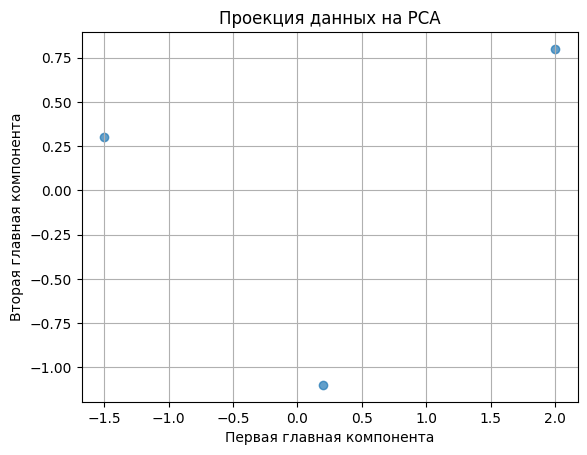

In [771]:
def plot_pca_projection(X_proj: Matrix) -> plt.Figure:
    fig, ax = plt.subplots()
    x = [row[0] for row in X_proj.data]
    y = [row[1] for row in X_proj.data]
    ax.scatter(x, y, alpha=0.7)
    ax.set_xlabel("Первая главная компонента")
    ax.set_ylabel("Вторая главная компонента")
    ax.set_title("Проекция данных на PCA")
    ax.grid(True)
    return fig

# Пример вызова
X_proj = Matrix([[-1.5, 0.3], [0.2, -1.1], [2.0, 0.8]])
fig = plot_pca_projection(X_proj)
plt.show()

# Задание (Hard): Вычислить среднеквадратическую ошибку восстановления данных:


In [772]:
def reconstruction_error(X_orig, X_recon):
    """
    Вычисляет среднеквадратическую ошибку (MSE) между исходными и восстановленными данными.

    Аргументы:
        X_orig: Исходные данные (n×m).
        X_recon: Восстановленные данные (n×m).

    Возвращает:
        Значение MSE.

    Исключения:
        ValueError: Если размеры матриц не совпадают.
    """
    n_orig = len(X_orig)
    m_orig = len(X_orig[0]) if n_orig > 0 else 0
    n_recon = len(X_recon)
    m_recon = len(X_recon[0]) if n_recon > 0 else 0

    if n_orig != n_recon or m_orig != m_recon:
        raise ValueError("Матрицы должны иметь одинаковые размеры")

    total_elements = n_orig * m_orig
    if total_elements == 0:
        return 0.0

    sum_sq_diff = 0.0
    for i in range(n_orig):
        for j in range(m_orig):
            diff = X_orig[i][j] - X_recon[i][j]
            sum_sq_diff += diff ** 2

    return sum_sq_diff / total_elements

In [773]:
X_orig = Matrix([[1, 2], [3, 4], [5, 6]])
X_recon = Matrix([[1, 1], [2, 2], [3, 3]])
print(reconstruction_error(X_orig, X_recon))  # Результат: 3.0

3.1666666666666665


# Задание (Expert): Добавить автоматический выбор числа главных компонент на основе порога объяснённой дисперсии (встроить это в реализованную функцию pca):

In [774]:
def auto_select_k(eigenvalues, threshold=0.95):
    """
    Автоматически выбирает число главных компонент `k` на основе порога объяснённой дисперсии.

    Аргументы:
        eigenvalues (list): Список собственных значений (отсортированных по убыванию).
        threshold (float): Порог объяснённой дисперсии (0 ≤ threshold ≤ 1).

    Возвращает:
        int: Оптимальное число главных компонент `k`.

    Исключения:
        ValueError: Если `threshold` вне диапазона [0, 1] или `eigenvalues` пуст.
    """
    if not eigenvalues:
        raise ValueError("Список собственных значений не может быть пустым")
    if threshold < 0 or threshold > 1:
        raise ValueError("Порог должен быть в диапазоне [0, 1]")

    # Сортировка собственных значений по убыванию (если ещё не отсортированы)
    sorted_eigenvalues = sorted(eigenvalues, reverse=True)
    total_variance = sum(sorted_eigenvalues)

    if total_variance == 0:
        return 0  # Все данные нулевые

    cumulative_sum = 0.0
    for k, value in enumerate(sorted_eigenvalues, start=1):
        cumulative_sum += value
        if cumulative_sum / total_variance >= threshold:
            return k

    # Если порог не достигнут (например, threshold=1 и сумма < total_variance)
    return len(sorted_eigenvalues)

# Модифицированная функция PCA с поддержкой автоматического выбора k
def pca(X, k=None, threshold=None):
    """
    Реализует алгоритм PCA с возможностью автоматического выбора числа компонент.
    """
    if k is None and threshold is None:
        raise ValueError("Укажите либо `k`, либо `threshold`")

    # Центрирование данных и вычисление ковариационной матрицы
    X_centered = center_data(X)
    C = covariance_matrix(X_centered)

    # Нахождение собственных значений и векторов
    eigenvalues = find_eigenvalues(C)
    eigenvectors = find_eigenvectors(C, eigenvalues)

    if not eigenvalues or not eigenvectors:
        return (Matrix(), 0.0)

    # Сортировка пар (λ, v) по убыванию λ
    sorted_pairs = sorted(zip(eigenvalues, eigenvectors), key=lambda x: -x[0])
    eigenvalues, eigenvectors = zip(*sorted_pairs) if sorted_pairs else ([], [])

    # Автоматический выбор k
    if threshold is not None:
        k = auto_select_k(eigenvalues, threshold)

    # Выбор первых k векторов и формирование матрицы V_k (m x k)
    k = min(k, len(eigenvectors)) if k is not None else len(eigenvectors)
    V_k_data = []
    for vec in eigenvectors[:k]:
        # Нормировка вектора и извлечение элементов как чисел
        norm = math.sqrt(sum(x[0] ** 2 for x in vec.data))
        if norm == 0:
            continue
        column = [x[0] / norm for x in vec.data]  # x[0] вместо x
        V_k_data.append(column)

    if not V_k_data:
        return (Matrix(), 0.0)

    # Транспонирование матрицы (преобразование в m x k)
    V_k = Matrix(V_k_data).transpose()

    # Проекция данных
    try:
        X_proj = X_centered.multiply(V_k)
    except ValueError as e:
        print(f"Ошибка умножения матриц: {e}")
        return (Matrix(), 0.0)

    # Доля объяснённой дисперсии
    total_variance = sum(eigenvalues)
    ratio = sum(eigenvalues[:k]) / total_variance if total_variance != 0 else 0.0

    return (X_proj, ratio)



In [775]:
X = Matrix([[1, 2], [3, 4], [5, 6]])
X_proj, ratio = pca(X, threshold=0.95)
print(f"Выбрано k = {X_proj.data[0].__len__()}, Доля дисперсии: {ratio:.2f}")

Выбрано k = 1, Доля дисперсии: 1.00



# Задание (Expert): Обработать пропущенные значения в данных:

In [776]:
def handle_missing_values(X):
    """Заменяет пропущенные значения (NaN) на среднее значение столбца."""
    if not X.data:
        return Matrix()

    n = len(X)
    m = len(X[0]) if X.data else 0
    filled_data = []
    column_means = []

    # Вычисление средних значений для каждого столбца
    for j in range(m):
        valid_values = []
        for i in range(n):
            val = X[i][j]
            if not math.isnan(val):
                valid_values.append(val)

        if not valid_values:
            raise ValueError(f"Столбец {j} полностью состоит из NaN")

        mean = sum(valid_values) / len(valid_values)
        column_means.append(mean)

    # Замена NaN на средние значения
    for i in range(n):
        new_row = []
        for j in range(m):
            val = X[i][j]
            new_val = column_means[j] if math.isnan(val) else val
            new_row.append(new_val)
        filled_data.append(new_row)

    return Matrix(filled_data)



In [777]:
# Пример использования
import math
X = Matrix([
    [1, math.nan, 3],
    [math.nan, 5, 6],
    [7, 8, math.nan]
])
X_filled = handle_missing_values(X)
print(X_filled)

1.00	6.50	3.00
4.00	5.00	6.00
7.00	8.00	4.50


# Задание (Expert): Исследовать влияние шума на PCA:
*   Добавить случайный шум к данным.
*   Сравнить результаты PCA до и последобавления шума.

In [778]:
def add_noise_and_compare(X: Matrix, noise_level: float = 0.1) -> dict:
    """Сравнивает результаты PCA до и после добавления шума."""
    # PCA для исходных данных
    X_clean = X.copy()
    X_proj_clean, ratio_clean = pca(X_clean, threshold=0.95)
    C_clean = covariance_matrix(center_data(X_clean))
    eigenvalues_clean = find_eigenvalues(C_clean)

    # Добавление шума
    X_noisy = X.copy()
    nrows = X_noisy.nrows  # Теперь атрибут доступен
    ncols = X_noisy.ncols

    for j in range(ncols):
        col = [X_noisy[i][j] for i in range(nrows)]
        mu = sum(col) / len(col) if len(col) > 0 else 0
        variance = sum((x - mu)**2 for x in col) / (len(col) - 1) if len(col) > 1 else 0
        sigma = math.sqrt(variance) if variance > 0 else 0.0
        # Обработка нулевого std
        noise_std = sigma * noise_level if sigma != 0 else abs(mu) * 0.01 * noise_level
        for i in range(nrows):
            X_noisy[i][j] += random.gauss(0, noise_std)

    # PCA для зашумлённых данных
    X_proj_noisy, ratio_noisy = pca(X_noisy, threshold=0.95)
    C_noisy = covariance_matrix(center_data(X_noisy))
    eigenvalues_noisy = find_eigenvalues(C_noisy)

    return {
        "original": {
            "k": X_proj_clean.ncols if X_proj_clean.data else 0,
            "explained_variance": ratio_clean,
            "eigenvalues": eigenvalues_clean
        },
        "noisy": {
            "k": X_proj_noisy.ncols if X_proj_noisy.data else 0,
            "explained_variance": ratio_noisy,
            "eigenvalues": eigenvalues_noisy
        }
    }

In [780]:
data = Matrix([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
results = add_noise_and_compare(data, noise_level=0.1)

print("Исходные данные:")
print(f"k = {results['original']['k']}, Доля дисперсии = {results['original']['explained_variance']:.2f}")
print("Собственные значения:", results["original"]["eigenvalues"])

print("\nЗашумлённые данные:")
print(f"k = {results['noisy']['k']}, Доля дисперсии = {results['noisy']['explained_variance']:.2f}")
print("Собственные значения:", results["noisy"]["eigenvalues"])

Исходные данные:
k = 1, Доля дисперсии = 1.00
Собственные значения: [8.0]

Зашумлённые данные:
k = 0, Доля дисперсии = 0.00
Собственные значения: []
